In [ ]:
import cv2
import numpy as np

!pip install ultralytics
# Load the pre-trained YOLOv8 model
from ultralytics import YOLO
modelseg = YOLO("yolov8x-seg.pt")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 8.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

100%|██████████| 137M/137M [00:00<00:00, 208MB/s]


In [ ]:
results = modelseg("/content/images/40835128-still-life-with-tea-cup-and-vintage-objects-on-wooden-table.jpg", save=True , show_labels=False,show_boxes=True)


image 1/1 /content/images/40835128-still-life-with-tea-cup-and-vintage-objects-on-wooden-table.jpg: 480x640 1 bottle, 1 cup, 1 bowl, 1 potted plant, 1 vase, 5372.4ms
Speed: 18.1ms preprocess, 5372.4ms inference, 2712.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict


In [ ]:
image_path = "/content/img3.jpg"

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

def segment_and_get_center_bbox(image_path):
    results = modelseg(image_path, save=True, show_labels=False, show_boxes=False)

    img = cv2.imread(image_path)
    height, width, _ = img.shape

    center_x = width // 2
    center_y = height // 2

    closest_bbox = None
    min_distance = float('inf')

    result = results[0]

    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        box_center_x = (x1 + x2) // 2
        box_center_y = (y1 + y2) // 2

        distance = np.sqrt((center_x - box_center_x) ** 2 + (center_y - box_center_y) ** 2)

        if distance < min_distance:
            min_distance = distance
            closest_bbox = [x1, y1, x2, y2]

    return closest_bbox



In [ ]:
center_bbox = segment_and_get_center_bbox(image_path)


image 1/1 /content/img3.jpg: 384x640 1 bottle, 1 orange, 1 laptop, 2 books, 3790.5ms
Speed: 11.2ms preprocess, 3790.5ms inference, 19.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


Bounding Box Coordinates of Object at the Center: [209, 196, 738, 593]


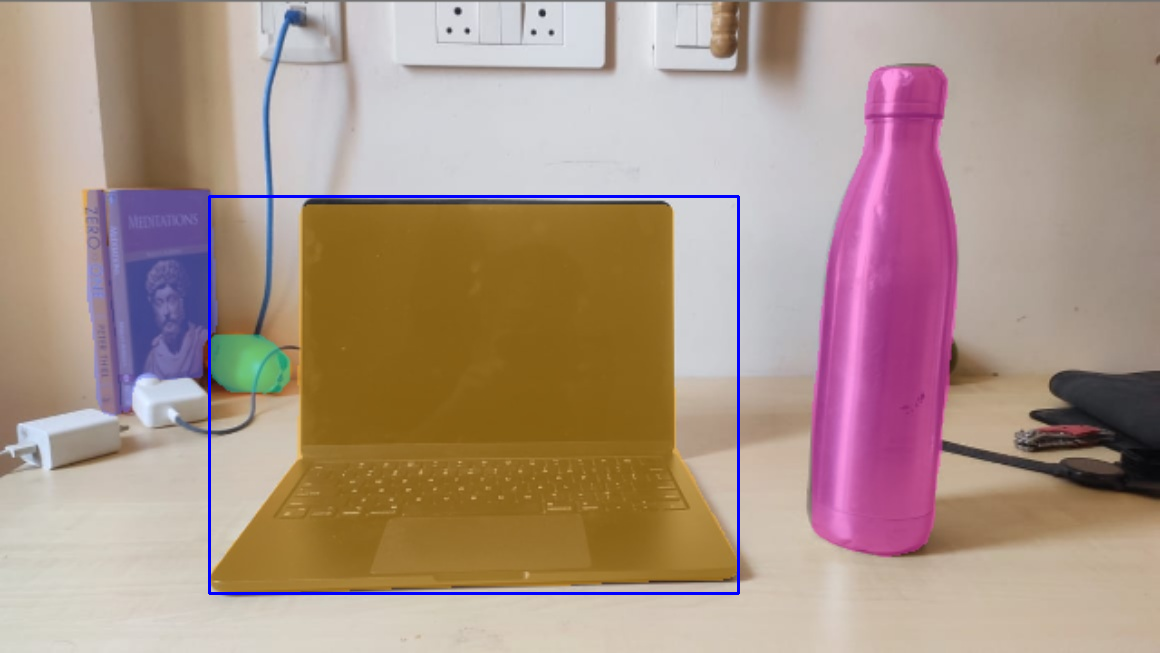

In [ ]:
def display_segmented_image(image_path, bbox):
    img = cv2.imread(image_path)
    x1, y1, x2, y2 = map(int, bbox)  # Convert coordinates to integers
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw the bounding box
    cv2_imshow(img)  # Use cv2_imshow from google.colab.patches

image_path = "/content/runs/segment/predict/img3.jpg"

print("Bounding Box Coordinates of Object at the Center:", center_bbox)

display_segmented_image(image_path, center_bbox)